In [117]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_file = "Mouse_metadata.csv"
study_results_file = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_file)
study_results = pd.read_csv(study_results_file)

# Combine the data into a single dataset
merged_data = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
merged_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [69]:
# Checking the number of mice.
number_of_mice = len(merged_data["Mouse ID"].unique())
number_of_mice 

249

In [71]:
 # Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_ids = merged_data.loc[merged_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mice_ids

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_ids_data = merged_data.loc[merged_data["Mouse ID"] == "g989"]
duplicate_mouse_ids_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [72]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_dataframe = merged_data[merged_data['Mouse ID'].isin(duplicate_mouse_ids_data)==False]
clean_dataframe

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
 # Checking the number of mice in the clean DataFrame.
len(clean_dataframe["Mouse ID"].unique())

249

# Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean = clean_dataframe.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']

median = clean_dataframe.groupby('Drug Regimen').median()['Tumor Volume (mm3)']

variance = clean_dataframe.groupby('Drug Regimen').var()['Tumor Volume (mm3)']

standard_deviation = clean_dataframe.groupby('Drug Regimen').std()['Tumor Volume (mm3)']

sem = clean_dataframe.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

summary_df = pd.DataFrame({"Mean Tumor Volume":mean,
                            "Median Tumor Volume":median,
                            "Tumor Volume Variance":variance,
                            "Tumor Volume Std. Dev.":standard_deviation,
                            "Tumor Volume Std. Err.":sem})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
summary_df = clean_dataframe.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
summary_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

# Bar & Pie Charts

In [9]:
#Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using PANDAS.

total_no_of_timepoints = clean_dataframe["Drug Regimen"].value_counts()
total_no_of_timepoints

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     161
Name: Drug Regimen, dtype: int64

Text(0, 0.5, 'Number of Mice Tested')

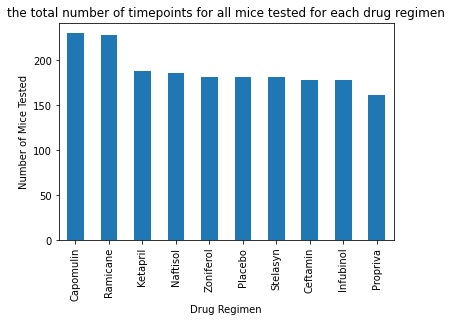

In [10]:
total_no_of_timepoints = clean_dataframe["Drug Regimen"].value_counts()
total_no_of_timepoints.plot(kind="bar")
plt.title("the total number of timepoints for all mice tested for each drug regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

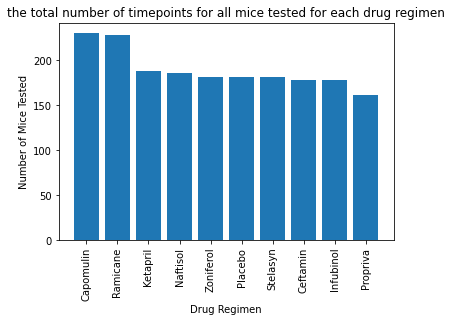

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using PYPLOT.
total_no_of_timepoints = clean_dataframe["Drug Regimen"].value_counts()
plt.bar(total_no_of_timepoints.index.values,
        total_no_of_timepoints.values)
plt.title("the total number of timepoints for all mice tested for each drug regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:ylabel='Sex'>

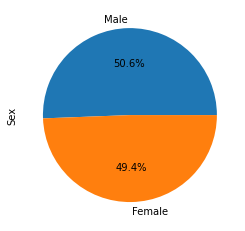

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using PANDAS
total_no_of_timepoints = clean_dataframe["Sex"].value_counts()
total_no_of_timepoints.plot(kind="pie",autopct='%1.1f%%')

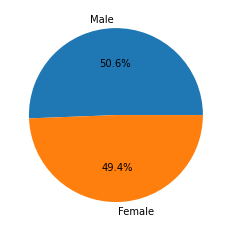

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using PYPLOT
total_no_of_timepoints = clean_dataframe.Sex.value_counts()
plt.pie(total_no_of_timepoints.values,
        labels=total_no_of_timepoints
        .index.values,autopct='%1.1f%%')
plt.show()

# Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_dataframe.groupby(["Mouse ID"])['Timepoint'].max()
last_timepoint = last_timepoint.reset_index()
last_timepoint

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
244,z435,10
245,z578,45
246,z581,45
247,z795,45


In [16]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_dataset = last_timepoint.merge(clean_dataframe, on=['Mouse ID','Timepoint'],how="left")
merged_dataset

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [27]:
# Put treatments into a list for for loop (and later for plot labels)
list_of_treatment = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in list_of_treatment:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_dataset.loc[merged_dataset["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol.append(final_tumor_vol)

In [36]:
# Determine outliers using upper and lower bounds
quartiles = final_tumor_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The median quartiles is: {quartiles[0.5]} ")
print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile is: {upperq}")
print(f"The interquartile range is: {iqr}")

The median quartiles is: 59.85195552 
The lower quartile is: 48.72207785
The upper quartile is: 64.29983003
The interquartile range is: 15.577752179999997


In [66]:
#continued 
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
outliers_1 = final_tumor_vol.loc[(final_tumor_vol < lower_bound)]
outliers_2 = final_tumor_vol.loc[(final_tumor_vol > upper_bound)]
print(f"{list_of_treatment} could be outliers.")

['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'] could be outliers.


In [63]:
#Lower & Upper bounds
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


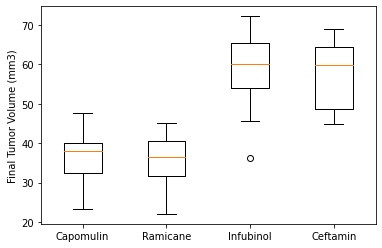

In [64]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vol, labels = list_of_treatment)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

# Line and Scatter Plots

In [85]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
treatment_with_capomulin = clean_dataframe.loc[clean_dataframe['Drug Regimen'] == "Capomulin"]
treatment_with_capomulin

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
226,j246,0,45.000000,0,Capomulin,Female,21,21
227,r554,0,45.000000,0,Capomulin,Female,8,17
228,s185,0,45.000000,0,Capomulin,Female,3,17
229,b742,0,45.000000,0,Capomulin,Male,7,21
...,...,...,...,...,...,...,...,...
1854,s710,45,40.728578,1,Capomulin,Female,1,23
1859,j119,45,38.125164,1,Capomulin,Female,7,23
1878,i557,45,47.685963,1,Capomulin,Female,1,24
1888,r944,45,41.581521,2,Capomulin,Male,12,25


In [86]:
#Mouse ID chosen - j246
mouse_j246 = treatment_with_capomulin.loc[treatment_with_capomulin['Mouse ID']== 'j246']
mouse_j246

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
226,j246,0,45.000000,0,Capomulin,Female,21,21
451,j246,5,45.641438,0,Capomulin,Female,21,21
704,j246,10,46.408361,0,Capomulin,Female,21,21
791,j246,15,43.312654,0,Capomulin,Female,21,21
1020,j246,20,44.020370,0,Capomulin,Female,21,21
1276,j246,25,44.555226,0,Capomulin,Female,21,21
1354,j246,30,38.044082,1,Capomulin,Female,21,21
1497,j246,35,38.753265,1,Capomulin,Female,21,21


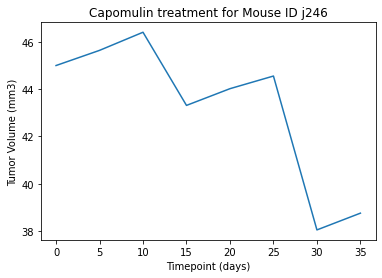

In [87]:
#Line plot 
plt.plot(mouse_j246['Timepoint'],mousedata['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment for Mouse ID j246')
plt.show()

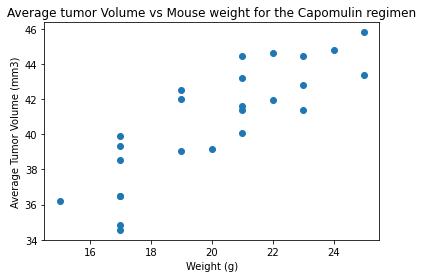

In [94]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
treatment_with_capomulin = clean_dataframe.loc[clean_dataframe['Drug Regimen'] == "Capomulin"]
capomulin_average = treatment_with_capomulin.groupby(['Mouse ID']).mean()
plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title("Average tumor Volume vs Mouse weight for the Capomulin regimen")
plt.show()

# Correlation & Regression 

In [129]:
all_data_for_cap = merged_data.loc[merged_data["Drug Regimen"] == "Capomulin"]
all_data_for_cap

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
226,j246,0,45.000000,0,Capomulin,Female,21,21
227,r554,0,45.000000,0,Capomulin,Female,8,17
228,s185,0,45.000000,0,Capomulin,Female,3,17
229,b742,0,45.000000,0,Capomulin,Male,7,21
...,...,...,...,...,...,...,...,...
1854,s710,45,40.728578,1,Capomulin,Female,1,23
1859,j119,45,38.125164,1,Capomulin,Female,7,23
1878,i557,45,47.685963,1,Capomulin,Female,1,24
1888,r944,45,41.581521,2,Capomulin,Male,12,25


In [130]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(all_data_for_cap['Weight (g)'],all_data_for_cap['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0], 2)}")

The correlation between mouse weight and the average tumor volume is 0.53


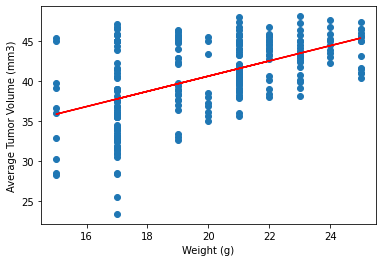

In [135]:
# Add the linear regression equation and line to plot
y_value = all_data_for_cap['Weight (g)']
plt.scatter(all_data_for_cap['Weight (g)'],all_data_for_cap['Tumor Volume (mm3)'])
plt.plot(all_data_for_cap['Weight (g)'],y_values,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

In [137]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(clean_dataframe['Weight (g)'],clean_dataframe['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0], 2)}")

The correlation between mouse weight and the average tumor volume is 0.59


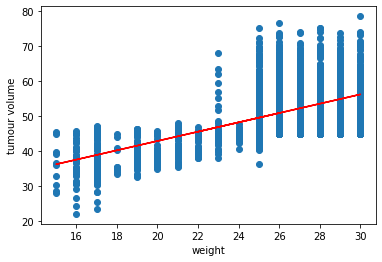

In [138]:
# Add the linear regression equation and line to plot
x_values = clean_dataframe['Weight (g)']
y_values = clean_dataframe['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('weight')
plt.ylabel('tumour volume')
plt.show()